# Module 3- Regression & Beta Calculation



   ### Welcome to the Answer notebook for Module 3 ! 
Make sure that you've submitted the module 2 notebook and unlocked Module 3 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [1]:
import pandas as pd
import numpy as np
gold = pd.read_csv('GOLD.csv')
gold['Date'] = gold['Date'].astype('datetime64')
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [2]:
gold[['Pred','new']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 2 columns):
Pred    411 non-null float64
new     512 non-null float64
dtypes: float64(2)
memory usage: 8.1 KB


In [3]:
predtrain = gold[gold['Pred'].notnull()]
predtrain.info()
predtest = gold[gold['Pred'].isnull()]
predtest.drop('Pred',axis=1,inplace=True)
predtest.info()
predtest.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 410
Data columns (total 9 columns):
Date        411 non-null datetime64[ns]
Price       411 non-null int64
Open        411 non-null int64
High        411 non-null int64
Low         411 non-null int64
Vol.        411 non-null object
Change %    411 non-null object
Pred        411 non-null float64
new         411 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 32.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 411 to 511
Data columns (total 8 columns):
Date        101 non-null datetime64[ns]
Price       101 non-null int64
Open        101 non-null int64
High        101 non-null int64
Low         101 non-null int64
Vol.        101 non-null object
Change %    101 non-null object
new         101 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 7.1+ KB


/opt/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Date,Price,Open,High,Low,Vol.,Change %,new
411,2018-12-11,31812,31850,31850,31618,10.53K,-0.26%,195.423493
412,2018-12-12,31626,31749,31749,31582,7.57K,-0.58%,44.232664
413,2018-12-13,31414,31550,31600,31337,8.43K,-0.67%,127.646233
414,2018-12-14,31437,31440,31514,31384,6.75K,0.07%,127.219539
415,2018-12-17,31501,31369,31530,31291,5.97K,0.20%,372.603976


In [4]:
OHLC = predtrain[['Price','Open','High','Low']]
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(OHLC,predtrain['Pred'])

OHLC_test = predtest[['Price','Open','High','Low']]
pred_test = lm.predict(OHLC_test)
y = pd.Series(pred_test)

y = pd.DataFrame(y,columns=['Pred'])
predtest = predtest.reset_index(drop=True)
prednew = pd.concat([predtest, y],axis=1)
# age_test_miss = age_test_miss.reset_index(drop=True)
gold_301a = pd.concat([predtrain,prednew], axis=0)
gold_301a = gold_301a.reset_index(drop=True)
gold_301a

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,Change %,Date,High,Low,Open,Pred,Price,Vol.,new
0,-1.79%,2017-05-04,28482,28025,28400,738.0,28060,0.08K,117.570740
1,0.44%,2017-05-05,28382,28135,28136,-146.0,28184,0.06K,295.430176
2,-0.23%,2017-05-08,28255,28097,28145,30.0,28119,7.85K,132.123714
3,-0.49%,2017-05-09,28192,27947,28125,357.0,27981,10.10K,101.298064
4,0.09%,2017-05-10,28146,27981,28060,124.0,28007,9.28K,112.153318
5,0.05%,2017-05-11,28100,27945,27995,149.0,28022,9.72K,182.427089
6,-0.01%,2017-05-12,28195,27985,28088,167.0,28019,9.48K,141.255137
7,-0.04%,2017-05-15,28157,27996,28049,22.0,28008,8.76K,120.069010
8,0.36%,2017-05-16,28159,28025,28025,34.0,28109,7.73K,218.401641
9,1.80%,2017-05-17,28638,28170,28170,420.0,28614,15.92K,919.376358


In [5]:
lm.coef_  ## Model coefficients

array([ 2.,  3., -1., -4.])

## Query 3.1 b

In [6]:
lr = LinearRegression()
OHLC_gold = gold[['Price','Open','High','Low']]
lr.fit(OHLC_gold,gold['new'])
newlinear = lr.predict(OHLC_gold)
newlinear = pd.Series(newlinear)
newlinear = pd.DataFrame(newlinear,columns=['new_linear'])
gold_301b = pd.concat([gold_301a, newlinear],axis=1)
gold_301b

,Change %,Date,High,Low,Open,Pred,Price,Vol.,new,new_linear
0,-1.79%,2017-05-04,28482,28025,28400,738.0,28060,0.08K,117.570740,118.200222
1,0.44%,2017-05-05,28382,28135,28136,-146.0,28184,0.06K,295.430176,295.460040
2,-0.23%,2017-05-08,28255,28097,28145,30.0,28119,7.85K,132.123714,131.646684
3,-0.49%,2017-05-09,28192,27947,28125,357.0,27981,10.10K,101.298064,101.199678
4,0.09%,2017-05-10,28146,27981,28060,124.0,28007,9.28K,112.153318,111.729011
5,0.05%,2017-05-11,28100,27945,27995,149.0,28022,9.72K,182.427089,182.351840
6,-0.01%,2017-05-12,28195,27985,28088,167.0,28019,9.48K,141.255137,141.049762
7,-0.04%,2017-05-15,28157,27996,28049,22.0,28008,8.76K,120.069010,119.536765
8,0.36%,2017-05-16,28159,28025,28025,34.0,28109,7.73K,218.401641,218.350826
9,1.80%,2017-05-17,28638,28170,28170,420.0,28614,15.92K,919.376358,918.682196


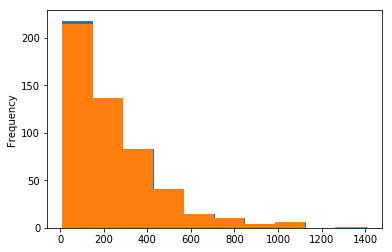

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
gold_301b['new'].plot(kind='hist')
gold_301b['new_linear'].plot(kind='hist')
plt.show()


## Query 3.2

In [8]:
nifty = pd.read_csv('Nifty50.csv')
nifty['Date'] = nifty['Date'].astype('datetime64')
nifty.info()
nifty.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 7 columns):
Date                 494 non-null datetime64[ns]
Open                 494 non-null float64
High                 494 non-null float64
Low                  494 non-null float64
Close                494 non-null float64
Shares Traded        494 non-null int64
Turnover (Rs. Cr)    494 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.1 KB


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [9]:
jubl = pd.read_csv('jublfood.csv')
jubl['Date'] = jubl['Date'].astype('datetime64')
jubl = jubl[jubl.Series == 'EQ']
jubl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 494
Data columns (total 15 columns):
Symbol                    494 non-null object
Series                    494 non-null object
Date                      494 non-null datetime64[ns]
Prev Close                494 non-null float64
Open Price                494 non-null float64
High Price                494 non-null float64
Low Price                 494 non-null float64
Last Price                494 non-null float64
Close Price               494 non-null float64
Average Price             494 non-null float64
Total Traded Quantity     494 non-null int64
Turnover                  494 non-null float64
No. of Trades             494 non-null int64
Deliverable Qty           494 non-null int64
% Dly Qt to Traded Qty    494 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(2)
memory usage: 61.8+ KB


### Query 3.2a

In [10]:
betadaily = pd.merge(jubl,nifty, on='Date', how='left')
betadaily = betadaily[['Close Price','Close']]
betadaily.columns = ['jublfood','nifty']
betadaily

,jublfood,nifty
0,1025.45,9445.40
1,1050.65,9512.25
2,1049.05,9525.75
3,1019.35,9429.45
4,1018.10,9427.90
5,1030.30,9438.25
6,993.15,9386.15
7,976.45,9360.55
8,1014.95,9509.75
9,992.70,9595.10


In [11]:
betadaily = betadaily.tail(63)
betadaily = betadaily.pct_change()*100
betadaily.reset_index(drop=True, inplace=True)
betadaily.drop(betadaily.index[0], inplace=True)
betadaily

,jublfood,nifty
1,3.655756,0.062825
2,0.436193,-1.136466
3,-2.037862,-0.500749
4,-1.674813,-0.527147
5,-1.649389,-0.348524
6,2.872145,-0.441000
7,-0.902720,-0.201469
8,2.851981,-0.778132
9,0.250383,-0.343954
10,-3.638261,1.236285


In [12]:
import statsmodels.api as sm

Xd = betadaily['nifty']
yd = betadaily['jublfood']

X1d = sm.add_constant(Xd)
model = sm.OLS(yd, X1d)
resultsdaily = model.fit()
resultsdaily.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               jublfood   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8419
Date:                Thu, 18 Jul 2019   Prob (F-statistic):              0.363
Time:                        02:46:00   Log-Likelihood:                -117.48
No. Observations:                  62   AIC:                             239.0
Df Residuals:                      60   BIC:                             243.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0562      0.208     -0.270      0.788      -0.472       0.360
nifty          0.2791      0.304      0.918      0.363      -0.329       0.888
==============================================================================
Omnibus:                        2.011   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.609
Skew:                           0.395   Prob(JB):                        0.447
Kurtosis:                       3.018   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Query 3.2b

In [13]:
betamonthly = pd.merge(jubl,nifty, on='Date', how='left')
betamonthly = betamonthly[['Date','Close Price','Close']]
betamonthly.columns = ['Date','jublfood','nifty']
betamonthly.info()
betamonthly['Year'] = betamonthly['Date'].map(lambda x: x.year)
betamonthly['Month'] = betamonthly['Date'].map(lambda x: x.month)
del betamonthly['Date']
betamonthly

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 493
Data columns (total 3 columns):
Date        494 non-null datetime64[ns]
jublfood    494 non-null float64
nifty       494 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 15.4 KB


,jublfood,nifty,Year,Month
0,1025.45,9445.40,2017,5
1,1050.65,9512.25,2017,5
2,1049.05,9525.75,2017,5
3,1019.35,9429.45,2017,5
4,1018.10,9427.90,2017,5
5,1030.30,9438.25,2017,5
6,993.15,9386.15,2017,5
7,976.45,9360.55,2017,5
8,1014.95,9509.75,2017,5
9,992.70,9595.10,2017,5


In [14]:
betamonthly = betamonthly.groupby(['Year', 'Month']).mean()
betamonthly

jublfood         nifty
Year Month                           
2017 5       994.965385   9498.557692
     6       942.190476   9606.954762
     7      1190.947619   9850.119048
     8      1341.804762   9901.183333
     9      1388.250000   9977.916667
     10     1542.917500  10138.677500
     11     1705.802273  10324.754545
     12     1728.220000  10322.262500
2018 1      1995.268182  10771.154545
     2      2002.934211  10533.105263
     3      2133.094737  10232.618421
     4      2452.088095  10472.933333
     5      2537.277273  10664.447727
     6      2244.050000  10742.973810
     7      1419.470455  10991.156818
     8      1504.652381  11498.440476
     9      1351.922222  11297.058333
     10     1163.759524  10383.809524
     11     1162.922500  10621.792500
     12     1274.115000  10778.442500
2019 1      1215.447826  10809.463043
     2      1310.627500  10833.840000
     3      1376.544737  11317.242105
     4      1380.992105  11666.452632
     5      1286.587500  11452.687500

In [15]:
betamonthly = betamonthly.pct_change()*100
betamonthly.drop(betamonthly.index[0],inplace=True)
betamonthly

jublfood     nifty
Year Month                     
2017 6      -5.304195  1.141195
     7      26.402001  2.531128
     8      12.666984  0.518413
     9       3.461401  0.774992
     10     11.141185  1.611166
     11     10.556933  1.835319
     12      1.314204 -0.024137
2018 1      15.452210  4.348776
     2       0.384210 -2.210063
     3       6.498492 -2.852785
     4      14.954486  2.348518
     5       3.474148  1.828660
     6     -11.556769  0.736335
     7     -36.745150  2.310189
     8       6.000965  4.615380
     9     -10.150528 -1.751387
     10    -13.918160 -8.083952
     11     -0.071924  2.291866
     12      9.561471  1.474798
2019 1      -4.604543  0.287802
     2       7.830832  0.225515
     3       5.029441  4.461965
     4       0.323082  3.085650
     5      -6.835999 -1.832306

In [16]:
Xm = betamonthly['nifty']
ym = betamonthly['jublfood']

X1m = sm.add_constant(Xm)
model = sm.OLS(ym, X1m)
resultsmonthly = model.fit()
resultsmonthly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               jublfood   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     2.947
Date:                Thu, 18 Jul 2019   Prob (F-statistic):              0.100
Time:                        02:46:00   Log-Likelihood:                -92.762
No. Observations:                  24   AIC:                             189.5
Df Residuals:                      22   BIC:                             191.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6291      2.572      0.245      0.809      -4.705       5.963
nifty          1.5639      0.911      1.717      0.100      -0.325       3.453
==============================================================================
Omnibus:                       19.179   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.589
Skew:                          -1.533   Prob(JB):                     6.20e-07
Kurtosis:                       7.381   Cond. No.                         2.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Daily Return Beta Value = 0.2791 
Monthly Return Beta Value = 1.5639

If the beta is negative then the prices of the stock will tend to increase with the fall in market.
Daily return beta value is low which implies that the stock is less volatile wrt nifty index and the returns will also be less.
Monthly return beta value, on the other hand, is highly greater than 1 which means that the stock volatility is very high and this increases the risk, but also increases its expected return.